<h4>
In this Movies DataFrame i will Walkthrow : 
</h4>

<ul> 
<li> <a href="#intro">Introduction</a>
<li> <a href="#questions">Questions</a></li>
<li> <a href="#importData">Import Data</a></li>
<li> <a href="#dataPreparation">Data Wrangling</a></li>
<li> <a href="#explorExploratory">Exploratory Data Analysis</a></li>
<li> <a href="#modeling">Modeling </a>
<li> <a href="#conclusions">Conclusions</a></li>
<li> <a href="#limitation">Limitation</a></li>

<a id='intro'></a>
## Introduction


> ### In this project i will make my analysis to answer question and understand this dataset and make model to predict if the movie will success or not and lastly i will try to understand the relashin between columns


<a id='importData'></a>
## Import Data

> In this section we will import data with all columns and try to have much review as possible


<h3>
Needed Librarys 
</h3>

In [1]:
import pandas as pd # improting pandas
import numpy as np # NumPy for math operation
import matplotlib.pyplot as plt  # matplotlib for data visualization
from sklearn.linear_model import LinearRegression # to make the model
from sklearn.preprocessing import LabelEncoder # to conver string to numeric for regression
import seaborn as sns # for data visulization
from sklearn.model_selection import train_test_split # for splitting and testing data


In [2]:
movies_df = pd.read_csv("tmdb-movies.csv") 
pd.options.display.max_columns = None # this code for display all columns in the dataframe

In [3]:
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='explorExploratory'></a>
## Explore Data

> In this section we will try to explore the data as much as possible

In [4]:
movies_df.shape # we have 21 columns and 10866 rows that's huge

(10866, 21)

In [5]:
# Exploring Data

movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
movies_df.info() # we have some null values here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_count'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'budget_adj'}>],
       [<Axes: title={'center': 'revenue_adj'}>, <Axes: >, <Axes: >]],
      dtype=object)

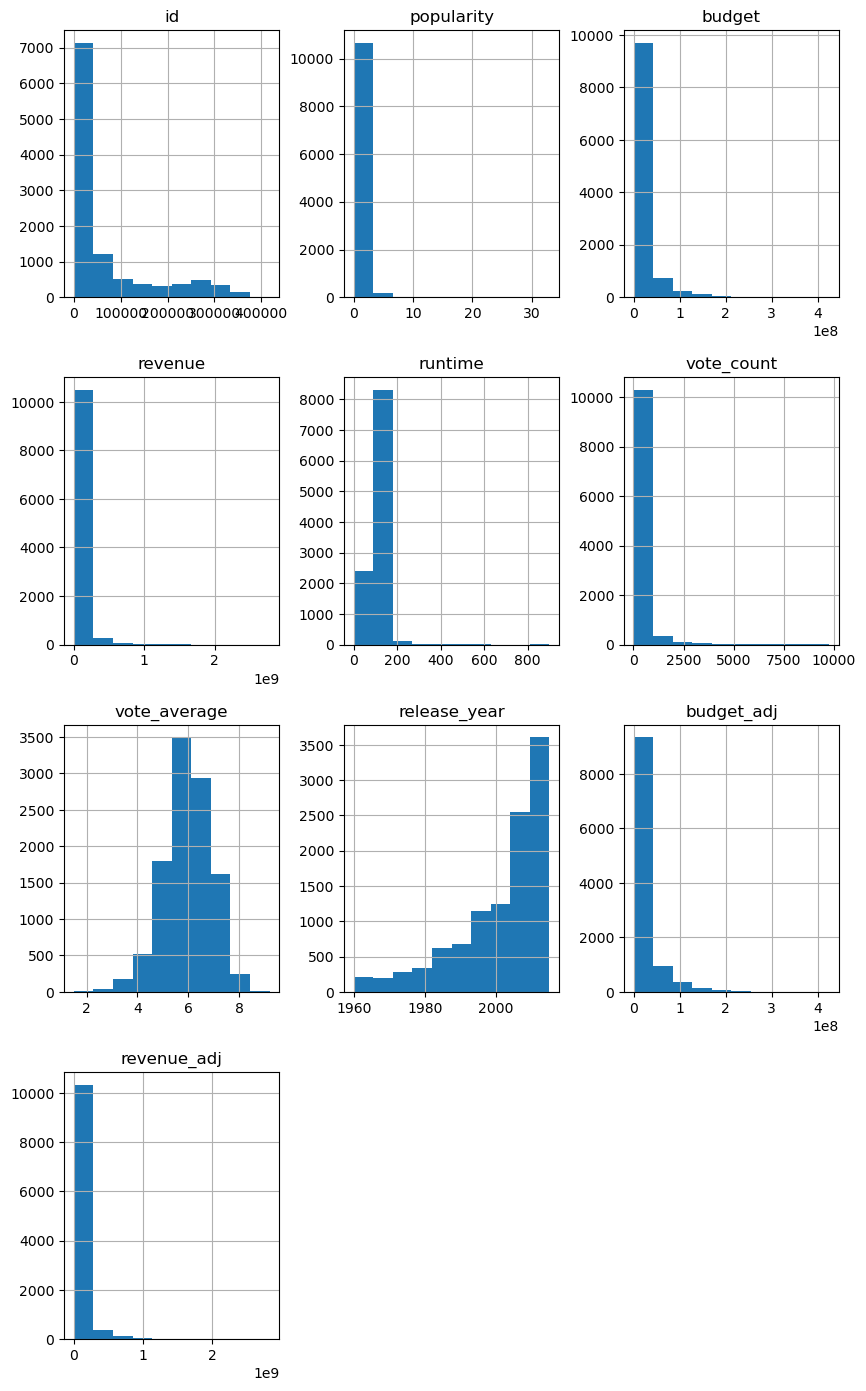

In [9]:
movies_df.hist(figsize=(10,17))

In [10]:
# as you can see there is some columns that i have to drop cause i will not need them

movies_df.drop(columns=['id', 'imdb_id','keywords','overview','tagline','homepage'],inplace=True)
movies_df.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='dataPreparation'></a>
## Data Wrangling

> In this section i will try fill missing values and 
> i may drop them and if they are a few 
> and trying to get the outliers and replace them by mean

In [11]:
# Take a look at null values
movies_df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# take a look at duplicates
movies_df.duplicated().sum()

1

<ul>
<li>So i have 1 duplicated value so i can easily drop it 
<li>but i have a lot of missing values in 3 columns
<li>so now if i droped them i may go through data loss problem 
<li>which is lossing data and can affect my analysis 
<li>if i fill data with mode introduces bias if missing values are not random
<li>So i will drop the missing values and drop one column
</ul>

In [13]:
#drop duplicates
def drop_dublicates(df):
    return df.drop_duplicates(inplace=True)
# drop spesific column
def drop_column(df,column_):
    return df.drop(columns=[column_],inplace=True)

drop_column(movies_df,"production_companies")
drop_dublicates(movies_df)

In [14]:
# drop all missing values
def drop_missing_values(df):
    return df.dropna()

cleaned_movies_data = drop_missing_values(movies_df)

In [15]:
cleaned_movies_data.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

> ### now for outliers to know the outliers lets make a boxplot that shows if there is an outlier or not
>  ### first before i start i need to make a new datafram with only the needed columns that i will need for the analysis

In [16]:
movies_df2 = cleaned_movies_data[["budget","vote_average","popularity","genres","runtime","revenue","original_title","cast","budget_adj","director"]]
movies_df2.head()

,budget,vote_average,popularity,genres,runtime,revenue,original_title,cast,budget_adj,director
0,150000000,6.5,32.985763,Action|Adventure|Science Fiction|Thriller,124,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,1.379999e+08,Colin Trevorrow
1,150000000,7.1,28.419936,Action|Adventure|Science Fiction|Thriller,120,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,1.379999e+08,George Miller
2,110000000,6.3,13.112507,Adventure|Science Fiction|Thriller,119,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,1.012000e+08,Robert Schwentke
3,200000000,7.5,11.173104,Action|Adventure|Science Fiction|Fantasy,136,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,1.839999e+08,J.J. Abrams
4,190000000,7.3,9.335014,Action|Crime|Thriller,137,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,1.747999e+08,James Wan


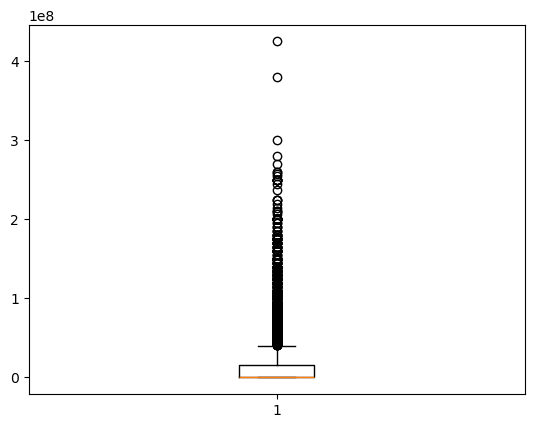

<Figure size 1000x700 with 0 Axes>

In [17]:
budget_boxplot = plt.boxplot(cleaned_movies_data["budget"])
fig = plt.figure(figsize =(10, 7))
plt.show() # there is outliers i have to deal with it

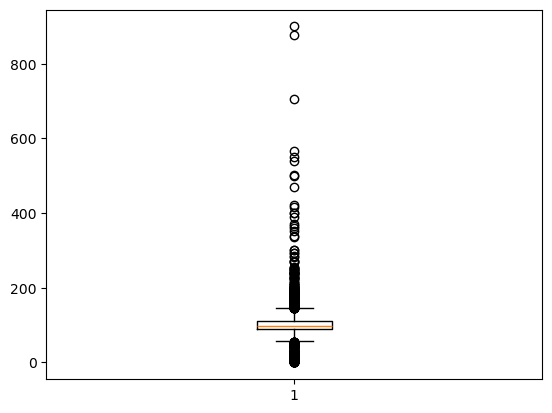

In [18]:
runtime_boxplot = plt.boxplot(cleaned_movies_data["runtime"]) # and here is more 
# runtime_boxplot = plt.boxplot(cleaned_movies_data["vote_count"])


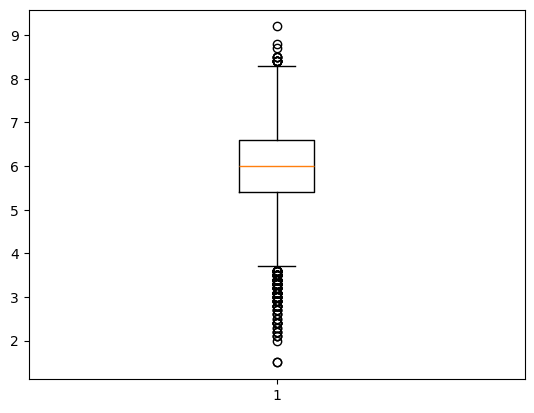

In [19]:

runtime_boxplot = plt.boxplot(cleaned_movies_data["vote_average"])

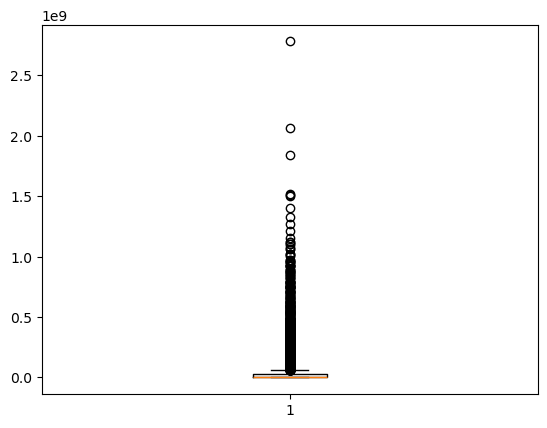

In [20]:
runtime_boxplot = plt.boxplot(cleaned_movies_data["revenue"])

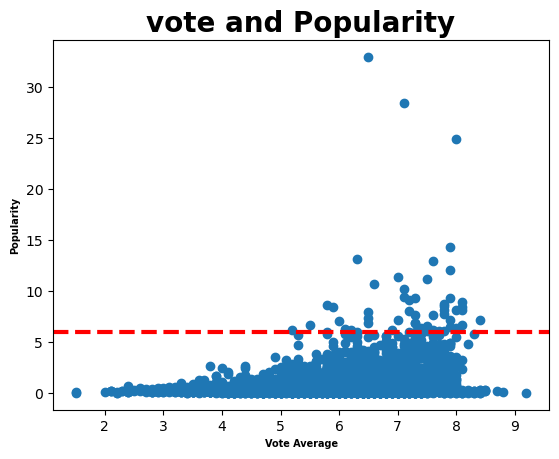

In [21]:
plt.scatter(x=movies_df2["vote_average"],y=movies_df2["popularity"])
plt.title('vote and Popularity',fontsize = 20, weight = "bold")
plt.xlabel('Vote Average',fontsize = 7, weight = "bold")
plt.ylabel('Popularity',fontsize = 7, weight = "bold")

plt.axhline(
  y=np.nanmean(movies_df2["vote_average"]), 
  color = 'r',
  linestyle = '--', 
  linewidth = 3
)

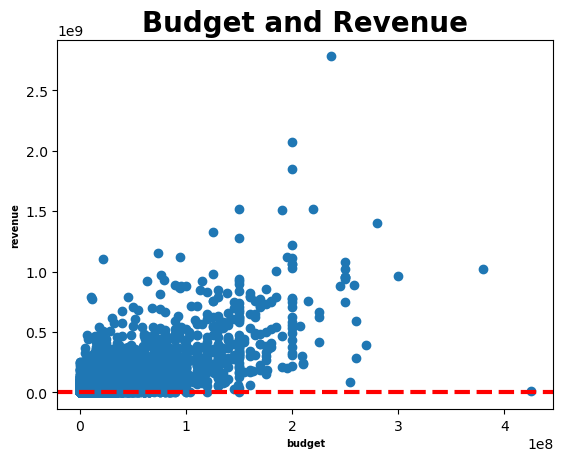

In [22]:
plt.scatter(x=movies_df2["budget"],y=movies_df2["revenue"])
plt.title('Budget and Revenue',fontsize = 20, weight = "bold")
plt.xlabel('budget',fontsize = 7, weight = "bold")
plt.ylabel('revenue',fontsize = 7, weight = "bold")
plt.axhline(
  y=np.nanmean(movies_df2["popularity"]), 
  color = 'r',
  linestyle = '--', 
  linewidth = 3
)

> making a function that removes outliers by IQR method

In [23]:
#as you can see here i have outliers so we have to remove them
def removes_outliers(df):
    threshold=1.5
  # Create a copy
    df_new = df.copy()

  # Iterate through numeric columns and replace outliers
    for i in df_new.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']):
    # calculate iqr and thresholds
        Q1 = df_new[i].quantile(0.25)
        Q3 = df_new[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_threshold = Q1 - threshold * IQR
        upper_threshold = Q3 + threshold * IQR
        # identify outliers and makes it detect zeros 
        outliers = ((df_new[i] < lower_threshold) | (df_new[i] > upper_threshold)) | (df_new[i] == 0)
    
        # Replace outliers with the mean
        df_new = df_new.loc[~outliers, :] # by this way i have filterd the outliers and now the nonoutliers is only here
    return df_new



In [24]:
movies_df2 = removes_outliers(movies_df2)
movies_df2.head()

,budget,vote_average,popularity,genres,runtime,revenue,original_title,cast,budget_adj,director
96,11930000,6.9,1.823130,Drama,118,18340000,The Dressmaker,Kate Winslet|Liam Hemsworth|Caroline Goodall|J...,1.097560e+07,Jocelyn Moorhouse
97,8500000,6.8,1.758618,Romance|Comedy,100,43528634,The DUFF,Mae Whitman|Robbie Amell|Bella Thorne|Bianca A...,7.819997e+06,Ari Sandel
98,10000000,5.5,1.742286,Horror,97,52882018,Sinister 2,Shannyn Sossamon|James Ransone|Tate Ellington|...,9.199996e+06,Ciaran Foy
102,4000000,3.9,1.651078,Thriller,91,50163103,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,3.679998e+06,Rob Cohen
104,30000000,6.2,1.532997,Comedy,104,49263404,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,2.759999e+07,Doug Ellin


<a id='questions'></a>
## Questions

<ul>
<li><a href="#question1">1 - what is the relations between the budget and vote</a></li>
<li><a href="#question2">2- is there a specific cast that have so much popularity or have great vote</a></li>
<li><a href="#question3">3 - is there a specific director that have so much popularity or have great vote</a></li>
<li><a href="#question4">4 - is there a relations between the runtime and the revenue</a></li>
<li><a href="#question5">5 - is there a relations between the runtime and the vote</a></li>
<li><a href="#question6">6 - is there a relation between genere and vote</a></li>
</ul>


<a id='question1'></a>
><h3> 1 - what is the relations between the budget and vote <br></h3>
> i will answer that by doing plots between budget and vote average and getting the coff


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'vote_average'}>]], dtype=object)

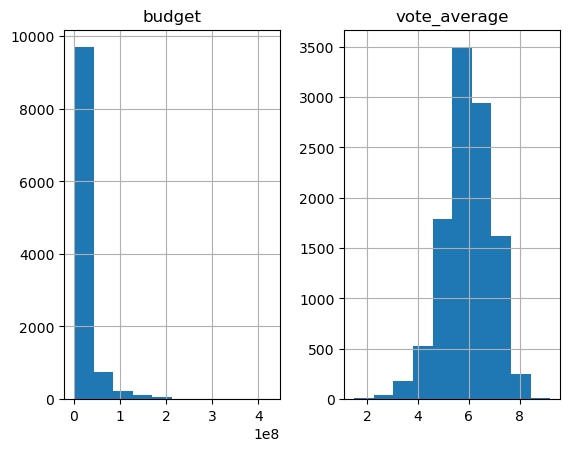

In [25]:
# lets plot these

buget_vote = movies_df[["budget","vote_average"]]

buget_vote.hist()

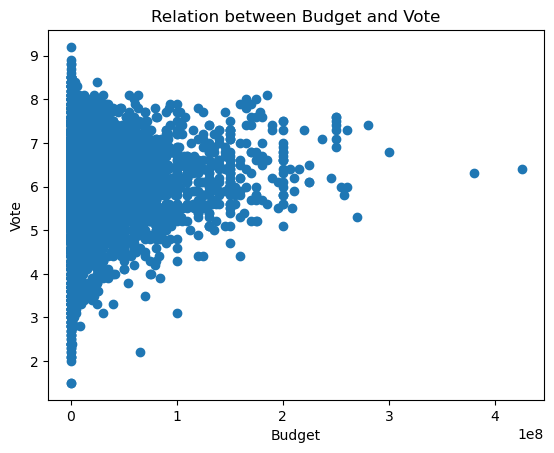

In [26]:

plt.scatter(buget_vote["budget"], buget_vote["vote_average"])
plt.xlabel('Budget')
plt.ylabel('Vote')
plt.title('Relation between Budget and Vote')
plt.show()


In [27]:
movies_df2.columns

Index(['budget', 'vote_average', 'popularity', 'genres', 'runtime', 'revenue',
       'original_title', 'cast', 'budget_adj', 'director'],
      dtype='object')

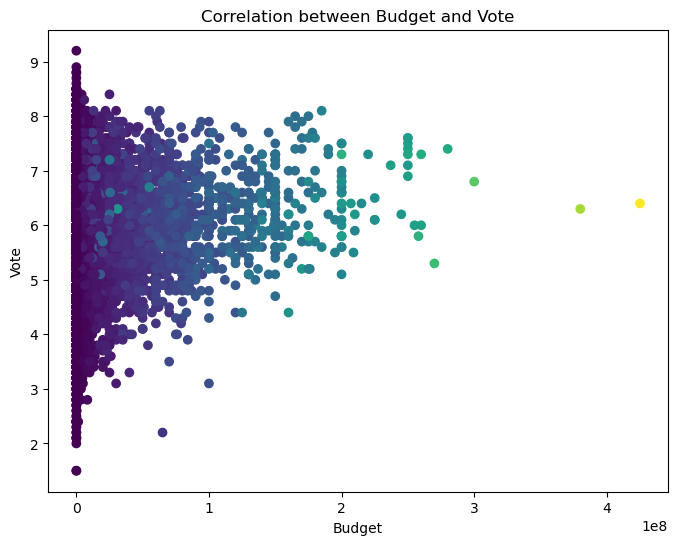

In [28]:
# Scatter Plot with color based on genre 
plt.figure(figsize=(8, 6))
plt.scatter(movies_df['budget'], movies_df['vote_average'],c=movies_df["budget_adj"], cmap='viridis')  # Adjust colormap as desired
plt.xlabel('Budget')
plt.ylabel('Vote')
plt.title('Correlation between Budget and Vote')
plt.show()


In [29]:
# getting the relation between them by Correlation method
correlation = buget_vote["budget"].corr(buget_vote["vote_average"])
"budget correlation coefficient:", correlation
# it seems there is very week relationship 


('budget correlation coefficient:', 0.08106672575599058)

<h4>Answer :</h4>
<h2>There is very weak relationship between them and you can see this from the correlation and from the plots above </h2>

<a id='question2'></a>
><h3> 2- is there a specific cast that have so much popularity or have great vote<br></h3>
> i will answer this by getting coff and ploting some plots that will help me understand and answer the question

In [30]:
cast_vote_counts = movies_df.groupby('cast')['vote_average'].sum() # getting the sum of the cast votes
most_popular_cast = cast_vote_counts.idxmax() # returning the most popular cast with the function idmax()


In [31]:
f"THe most popular cast is  : {most_popular_cast}"

'THe most popular cast is  : Louis C.K.'

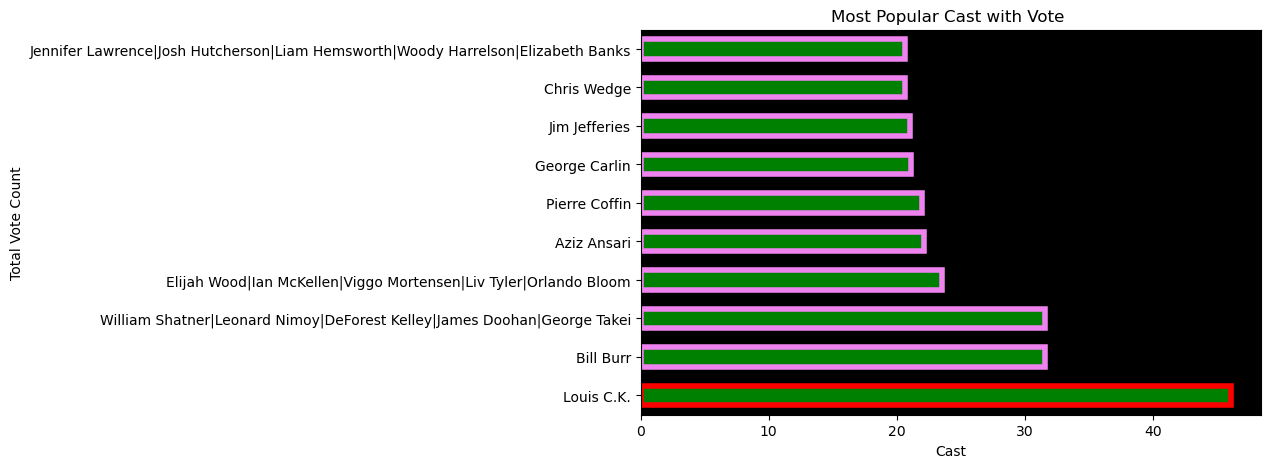

In [32]:
# now lets do a bar chart viewing the most popular cast but they are soo big so i will
# represent te most 10 only
edgecolor=['red','violet','violet','violet','violet','violet','violet','violet','violet','violet'] # to make the most greatest one is red
top_n_cast = cast_vote_counts.nlargest(10) # taking the greatest 10
plt.figure(figsize=(8, 5)) # resizeing the image to fit the charts 
ax = plt.axes() # making a varible named ax to aces the plt.axes() function that i will use for coloring the chart and making foucs on the highest value
top_n_cast.plot(kind='barh', color='green',edgecolor=edgecolor,linewidth=4) # making the barchart in horizental way and the color is red
ax.set_facecolor("black")
plt.xlabel('Cast')
plt.ylabel('Total Vote Count')
plt.title('Most Popular Cast with Vote ')
plt.show()
# as we can see here the louis c.k is the most higher vote


<a id='question3'></a>
><h3> 3 - is there a specific director that have so much popularity or have great vote<br></h3>

### to answer this question we will do the same as the second question but we will replace the cast with director

In [33]:
director_vote_counts = movies_df.groupby('director')['vote_average'].sum() # getting the sum of the cast votes
most_popular_director= director_vote_counts.idxmax() # returning the most popular director with the function idmax()

In [34]:
f"THe most popular Director is  : {most_popular_director}"

'THe most popular Director is  : Woody Allen'

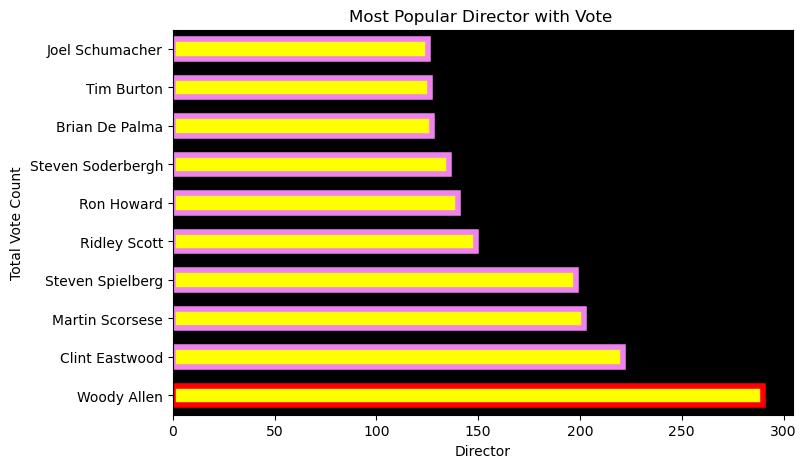

In [35]:
#  now lets do a bar chart viewing the most popular Director but they are soo big so i will
# represent te most 10 only

edgecolor=['red','violet','violet','violet','violet','violet','violet','violet','violet','violet'] # to make the highest value is red
top_n_director = director_vote_counts.nlargest(10) # taking the greatest 10
plt.figure(figsize=(8, 5)) # resizeing the image to fit the charts 
ax = plt.axes() # making a varible named ax to aces the plt.axes() function
top_n_director.plot(kind='barh', color='yellow',edgecolor=edgecolor,linewidth=4) # making the barchart in horizental way and the color is violet(tried to use different color this time (: )
ax.set_facecolor("black")
plt.xlabel('Director')
plt.ylabel('Total Vote Count')
plt.title('Most Popular Director with Vote ')
plt.show()
# as we can see here the Woody Allen is the most higher vote


<a id='question4'></a>
><h3> 4 - is there a relations between the runtime and the revenue<br></h3>



> ### i will answer this question by getting the correlation between them

In [36]:
runtime_revenue_correlation = movies_df['runtime'].corr(movies_df['revenue'])
print("Correlation coefficient:", runtime_revenue_correlation)

Correlation coefficient: 0.16282967830819375


> i will get the coff with model reggresion and plot it in scatter plot and trendline

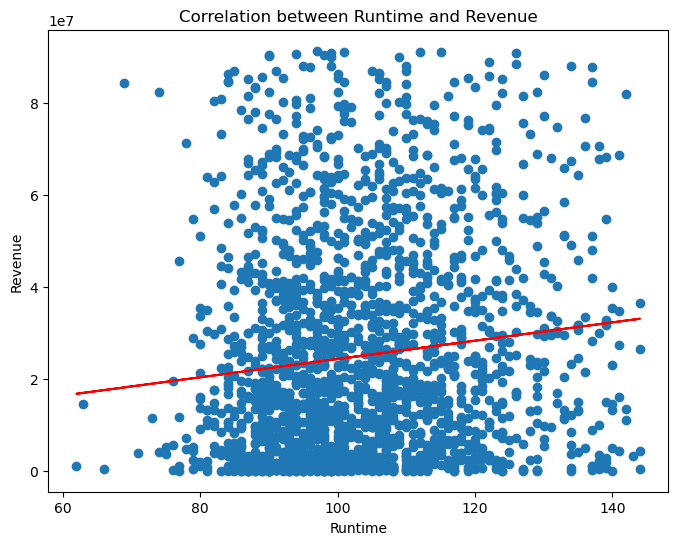

In [37]:

# Fit the model
runtime_revenue_model = LinearRegression()
runtime_revenue_model.fit(movies_df2[['runtime']], movies_df2[['revenue']])

# Get coefficients by model
m = runtime_revenue_model.coef_[0]
b = runtime_revenue_model.intercept_

# Plot data and trendline
plt.figure(figsize=(8, 6))
plt.scatter(movies_df2['runtime'], movies_df2['revenue'])
plt.plot(movies_df2['runtime'], m * movies_df2['runtime'] + b, color='red')  # Trendline equation
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Correlation between Runtime and Revenue')
plt.show()


### to have more clear analysis i will calc the coff for every generes


In [38]:

# Group by genre
genre_groups = movies_df.groupby('genres')
highCoff_Forgenere_runtimeRevenue = []
# i will calculate correlation coefficient for each genre
# and append them to a list 
for genre, group_df in genre_groups:
    correlation = group_df['runtime'].corr(group_df['revenue'])
    if correlation >= 0.5:
        highCoff_Forgenere_runtimeRevenue.append(f"Genre: {genre}, Correlation: {correlation}")
    print(f"Genre: {genre}, Correlation: {correlation}")


Genre: Action, Correlation: 0.3081576694140325
Genre: Action|Adventure, Correlation: -0.07589640906922548
Genre: Action|Adventure|Animation, Correlation: nan
Genre: Action|Adventure|Animation|Comedy|Drama, Correlation: nan
Genre: Action|Adventure|Animation|Comedy|Family, Correlation: nan
Genre: Action|Adventure|Animation|Drama|Family, Correlation: nan
Genre: Action|Adventure|Animation|Family, Correlation: nan
Genre: Action|Adventure|Animation|Family|Fantasy, Correlation: 0.9148074042510733
Genre: Action|Adventure|Animation|Family|Mystery, Correlation: nan
Genre: Action|Adventure|Animation|Family|Science Fiction, Correlation: 0.9797958971132713
Genre: Action|Adventure|Animation|Fantasy, Correlation: nan
Genre: Action|Adventure|Animation|Fantasy|Horror, Correlation: nan
Genre: Action|Adventure|Animation|Fantasy|Science Fiction, Correlation: nan
Genre: Action|Adventure|Animation|Science Fiction, Correlation: 0.27379041022951084
Genre: Action|Adventure|Animation|Science Fiction|Crime, Corr

C:\Users\marwa\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\marwa\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\marwa\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\marwa\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\marwa\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Genre: Action|Animation|Fantasy, Correlation: nan
Genre: Action|Animation|Fantasy|Horror, Correlation: nan
Genre: Action|Animation|Fantasy|Science Fiction, Correlation: nan
Genre: Action|Animation|Horror, Correlation: nan
Genre: Action|Animation|Science Fiction, Correlation: 0.24161141458360155
Genre: Action|Animation|Science Fiction|Thriller, Correlation: nan
Genre: Action|Animation|Thriller, Correlation: nan
Genre: Action|Comedy, Correlation: 0.2917108001351637
Genre: Action|Comedy|Adventure, Correlation: nan
Genre: Action|Comedy|Animation, Correlation: nan
Genre: Action|Comedy|Crime, Correlation: 0.5157726188225115
Genre: Action|Comedy|Crime|Drama, Correlation: 0.8824975032927699
Genre: Action|Comedy|Crime|Drama|Music, Correlation: nan
Genre: Action|Comedy|Crime|Drama|Thriller, Correlation: 0.6629329364194197
Genre: Action|Comedy|Crime|Mystery, Correlation: 1.0
Genre: Action|Comedy|Crime|Mystery|Family, Correlation: nan
Genre: Action|Comedy|Crime|Mystery|Thriller, Correlation: nan
G

In [39]:
highCoff_Forgenere_runtimeRevenue[0:10]

['Genre: Action|Adventure|Animation|Family|Fantasy, Correlation: 0.9148074042510733',
 'Genre: Action|Adventure|Animation|Family|Science Fiction, Correlation: 0.9797958971132713',
 'Genre: Action|Adventure|Comedy|Crime|Drama, Correlation: 0.9923558746138285',
 'Genre: Action|Adventure|Comedy|Drama, Correlation: 0.533532468193818',
 'Genre: Action|Adventure|Comedy|Family|Fantasy, Correlation: 0.8761300620338026',
 'Genre: Action|Adventure|Comedy|Western, Correlation: 0.7664256734729306',
 'Genre: Action|Adventure|Crime, Correlation: 0.8669739555780152',
 'Genre: Action|Adventure|Crime|Drama, Correlation: 0.8868440532177394',
 'Genre: Action|Adventure|Crime|Drama|Mystery, Correlation: 0.5157846807341459',
 'Genre: Action|Adventure|Crime|Science Fiction|Thriller, Correlation: 1.0']

### So as we can see here there is a strong relation by some Catgories in some generes by coff

<a id='question5'></a>
> <h3> 5 - is there a relations between the runtime and the vote<br></h3>


In [40]:
runtime_vote_correlation = movies_df2['runtime'].corr(movies_df2['vote_average'])
print("Correlation coefficient:", runtime_vote_correlation)


Correlation coefficient: 0.3043297822248738


> the coff seems high leads to a positive relation

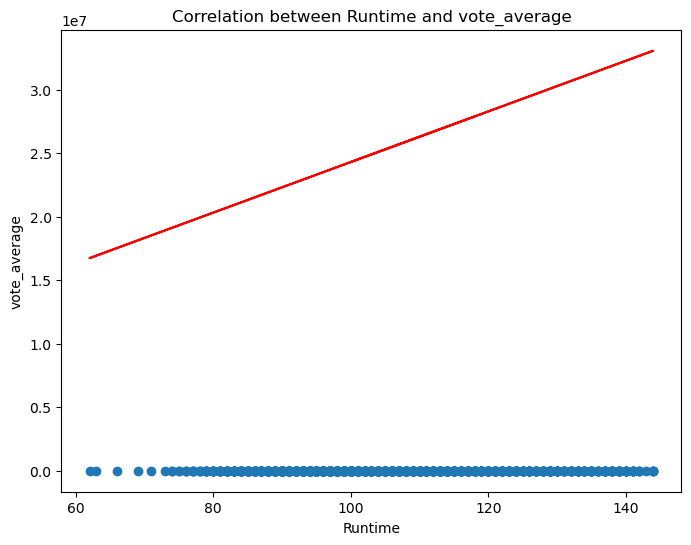

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(movies_df2['runtime'], movies_df2['vote_average'])
plt.plot(movies_df2['runtime'], m * movies_df2['runtime'] + b, color='red')  
plt.xlabel('Runtime')
plt.ylabel('vote_average')
plt.title('Correlation between Runtime and vote_average')
plt.show()


C:\Users\marwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


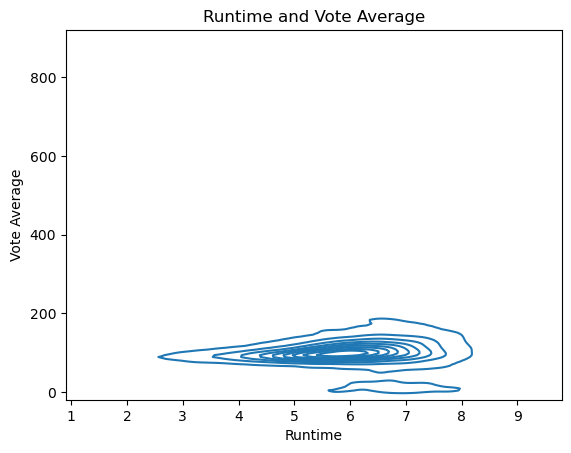

In [42]:
runtime_Vote_average = movies_df[["runtime","vote_average"]]
sns.kdeplot(data=runtime_Vote_average, x="vote_average", y="runtime")
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.title('Runtime and Vote Average')
plt.show()


> ### from the previoes plot i indicate that there is a  positive correlation between runtime and vote average, but it's not very strong.

<a id='modeling'></a>
<h1> Data modeling </h1>


> ## i will make a new column based on the ratings and make a machine learning model can predict if it a succesful movie or not

>### making the new column based vote average if the vote_average is more than 5 or equal to it so make the value by 1 and if not make it 0  

In [43]:
movies_df2['sucss'] = movies_df2['vote_average'].apply(lambda x: 1 if x >= 5 else 0)  
movies_df2.head()

,budget,vote_average,popularity,genres,runtime,revenue,original_title,cast,budget_adj,director,sucss
96,11930000,6.9,1.823130,Drama,118,18340000,The Dressmaker,Kate Winslet|Liam Hemsworth|Caroline Goodall|J...,1.097560e+07,Jocelyn Moorhouse,1
97,8500000,6.8,1.758618,Romance|Comedy,100,43528634,The DUFF,Mae Whitman|Robbie Amell|Bella Thorne|Bianca A...,7.819997e+06,Ari Sandel,1
98,10000000,5.5,1.742286,Horror,97,52882018,Sinister 2,Shannyn Sossamon|James Ransone|Tate Ellington|...,9.199996e+06,Ciaran Foy,1
102,4000000,3.9,1.651078,Thriller,91,50163103,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,3.679998e+06,Rob Cohen,0
104,30000000,6.2,1.532997,Comedy,104,49263404,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,2.759999e+07,Doug Ellin,1


>### now i will make a machine learning model but first i have to convert all the string values to numeric 
>### i will do that by dumies functions() and linear regresion

> ### but first i will make two vars one will have the trainging data and the other one will have the predection data


In [44]:
# Example: Director feature
encoder = LabelEncoder()
movies_df2['director_encoded'] = encoder.fit_transform(movies_df2['director'])
movies_df2['sucss_encoded'] = encoder.fit_transform(movies_df2['sucss'])
movies_df2['genres_encoded'] = encoder.fit_transform(movies_df2['genres'])

In [45]:
movies_df2.head()

,budget,vote_average,popularity,genres,runtime,revenue,original_title,cast,budget_adj,director,sucss,director_encoded,sucss_encoded,genres_encoded
96,11930000,6.9,1.823130,Drama,118,18340000,The Dressmaker,Kate Winslet|Liam Hemsworth|Caroline Goodall|J...,1.097560e+07,Jocelyn Moorhouse,1,557,1,309
97,8500000,6.8,1.758618,Romance|Comedy,100,43528634,The DUFF,Mae Whitman|Robbie Amell|Bella Thorne|Bianca A...,7.819997e+06,Ari Sandel,1,75,1,526
98,10000000,5.5,1.742286,Horror,97,52882018,Sinister 2,Shannyn Sossamon|James Ransone|Tate Ellington|...,9.199996e+06,Ciaran Foy,1,198,1,461
102,4000000,3.9,1.651078,Thriller,91,50163103,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,3.679998e+06,Rob Cohen,0,1015,0,555
104,30000000,6.2,1.532997,Comedy,104,49263404,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,2.759999e+07,Doug Ellin,1,323,1,200


In [46]:
X = movies_df2[["budget","runtime","revenue","genres_encoded","director_encoded"]] # the columns 
Y =movies_df2["sucss_encoded"]

In [47]:
# movies_df4.head()
Y.head(2)

96    1
97    1
Name: sucss_encoded, dtype: int64

In [48]:
X.head()

,budget,runtime,revenue,genres_encoded,director_encoded
96,11930000,118,18340000,309,557
97,8500000,100,43528634,526,75
98,10000000,97,52882018,461,198
102,4000000,91,50163103,555,1015
104,30000000,104,49263404,200,323


>### i will make a machine learning model that will predict if this movie will succs or not based on the budget and runtime reveneue generes director

In [49]:
# creating 4 vars that will test and train our data and taking the 30% from the data to test it
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2) 


In [50]:
movies_model = LinearRegression() 
movies_model.fit(x_train,y_train) # fitting the data

LinearRegression()

In [51]:
x_test.head(2)

,budget,runtime,revenue,genres_encoded,director_encoded
8418,1000000,91,17985893,367,564
976,25000000,111,39171130,572,1072


In [52]:
movies_model.predict([[25000000,98,17193231,604,985]])

C:\Users\marwa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.8656458])

In [53]:
movies_model.score(x_test,y_test)

0.004382930738275781

<a id="conclusions"> </a>
# Conclusions

### Conclusion Question 1

> There is very weak relationship between them and you can see this from the correlation and from the plots above

### Conclusion Question 2

>i can see that the most Director according
> to vote Woody Allen

### Conclusion Question 3

> i can see that the most popular Cast is Louis C.K

### Conclusion Question 4

> there is no relation between runtime and vote average
> but there is some generes that have strong correlation between runtime and vote

### Conclusion Question 5

> correlation is high leads to a positive relation between runtime and vote

> Correlation is high for some generes
> and i can see 

<a id="limitation"> </a>
# Limitation

> Some values was 0 like in budget and revenue and when i was doing data wrangling
> i didn't know count them as outliers or not
> There were a lot of null values in companies producation and i had to drop it cause it had a lot of missing data
> and a lot of outliers